**Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
songs = pd.read_csv("/content/songs.csv")
songs.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
songs["loudness"] = scaler.fit_transform(songs["loudness"].values.reshape(-1, 1))
songs = songs.drop_duplicates(subset=["name", "artists"], keep="first")

In [ ]:
explicit_perc = songs["explicit"].sum()/len(songs) * 100
print("The percentage of explicit songs on Spotify is {explicit_perc}".format(explicit_perc = explicit_perc))
fig = px.histogram(songs, x="popularity", hover_data=songs.columns)
fig.show()

The percentage of explicit songs on Spotify is 7.898558979324485


In [ ]:
songs.drop(songs[songs["popularity"] < 20].index, inplace=True, axis=0)
fig = px.histogram(songs, x="popularity", color="explicit")
fig.show()

In [ ]:
song_atribs = songs.drop(['artists',
       'explicit', 'id', 'valence', 'year', 'name', 'mode', 'tempo', 'duration_ms', 'key', 'release_date', 'popularity'], inplace=False, axis=1)
song_atribs = song_atribs.replace(0, np.nan).dropna(axis=0, how='any')
song_atribs.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
1758,0.980,0.314,0.351,0.824000,0.0775,0.657441,0.0383
1760,0.995,0.609,0.340,0.884000,0.1950,0.652502,0.0752
1828,0.600,0.687,0.289,0.001350,0.0850,0.754014,0.0526
1830,0.770,0.708,0.453,0.000002,0.0686,0.773107,0.0727
1891,0.963,0.472,0.167,0.000002,0.2030,0.684957,0.0307


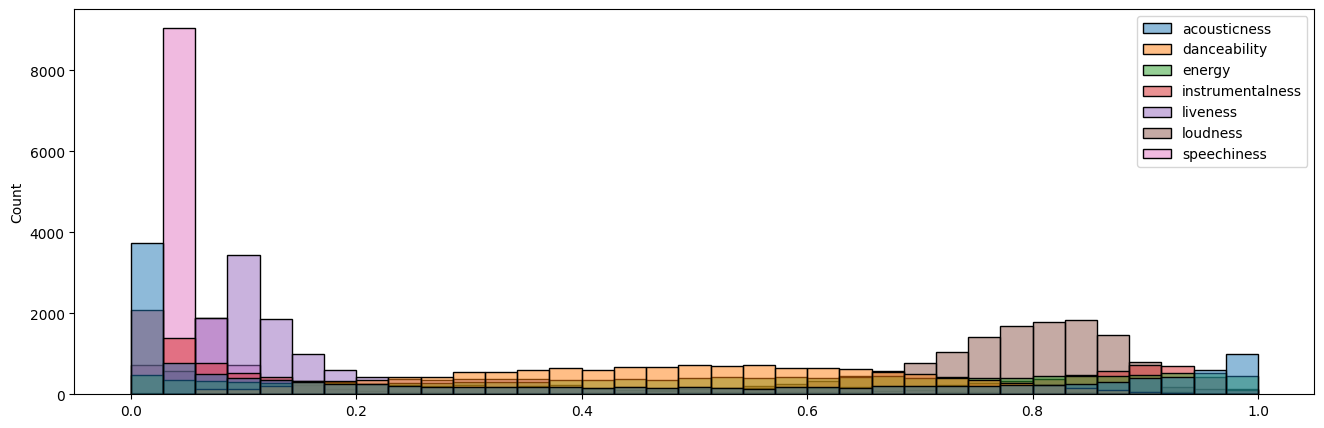

In [ ]:
song_atribs = song_atribs.loc[(song_atribs["instrumentalness"] > 0.01)]
plt.figure(figsize=(16, 5))
sns.histplot(data=song_atribs, stat='count')
plt.show()

**Preprocessing Stage - 1**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

<ipython-input-8-7f29651bbadb>:8: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [ ]:
songs = pd.read_csv("/content/songs.csv")
songs.drop_duplicates(subset=["name", "artists"], keep='first')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.99500,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10.0,0.1510,-12.428,1.0,Singende Bataillone 1. Teil,0.0,1928,0.0506,118.469,0.7790,1928.0
1,0.99400,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8.0,0.0763,-28.454,1.0,"Fantasiestücke, Op. 111: Più tosto lento",0.0,1928,0.0462,83.972,0.0767,1928.0
2,0.60400,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5.0,0.1190,-19.924,0.0,Chapter 1.18 - Zamek kaniowski,0.0,1928,0.9290,107.177,0.8800,1928.0
3,0.99500,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1.0,0.1110,-14.734,0.0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.7200,1928.0
4,0.99000,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11.0,0.0980,-16.829,1.0,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1.0,1928,0.0424,62.149,0.0693,1928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77896,0.14800,"['Romeo Santos', 'El Chaval de la Bachata']",0.878,225387,0.8750,0,4XEXrp37kZXpQTB2r5vWbS,0.000,11.0,0.1450,-1.457,0.0,Canalla,65.0,2019-04-05,0.0453,130.027,0.9020,2019.0
77897,0.30500,['Lil Loaded'],0.736,176088,0.8120,1,3Rxd5TK14uILnU972CThFa,0.000,3.0,0.0675,-4.647,0.0,Out My Body,61.0,2019-12-06,0.2220,105.015,0.8870,2019.0
77898,0.00438,['Hillsong UNITED'],0.425,353547,0.6950,0,7nzmXUrZwSOJPNmV0mOmEn,0.000,9.0,0.6910,-7.930,1.0,Good Grace - Live,58.0,2019-04-26,0.0477,142.110,0.2430,2019.0
77899,0.07410,['CHUNG HA'],0.530,221813,0.8290,0,0xq4ZTcmwBfkPGo4RRKmMe,0.000,3.0,0.0993,-2.526,0.0,Gotta Go,69.0,2019-01-02,0.0445,101.850,0.4230,2019.0


In [ ]:
songs["artists"].fillna(songs.artists.mode())

0                                ['Carl Woitschach']
1           ['Robert Schumann', 'Vladimir Horowitz']
2                            ['Seweryn Goszczyński']
3                               ['Francisco Canaro']
4           ['Frédéric Chopin', 'Vladimir Horowitz']
                            ...                     
77896    ['Romeo Santos', 'El Chaval de la Bachata']
77897                                 ['Lil Loaded']
77898                            ['Hillsong UNITED']
77899                                   ['CHUNG HA']
77900                     ['Residente', 'Bad Bunny']
Name: artists, Length: 77901, dtype: object

In [ ]:
songs.drop(songs[songs["popularity"] < 30].index, inplace=True, axis=0)
songs.sort_values(by="popularity", inplace=True, ascending=False)
songs.shape

(38372, 19)

In [ ]:
songs["spotify_id"] = songs["id"]
songs["id"] = 0
songs.head(2)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,spotify_id
55550,0.158,['Beéle'],0.820,204000,0.565,0,0,0.000024,6.0,0.0469,-5.965,1.0,Loco,82.0,2019-08-08,0.1700,105.110,0.773,2019.0,2J9B63FawlTaPdg4eH5X03
55606,0.237,['Camilo'],0.606,209766,0.853,0,0,0.000000,9.0,0.2510,-2.975,1.0,Favorito,82.0,2020-04-17,0.0545,178.043,0.822,2020.0,0jT8Nl0shPS8115is0wD2Q


In [ ]:
songs["artists"] = songs["artists"].map(lambda x: x.split(', ')[0])
songs["artists"] = songs["artists"].map(lambda x: x.replace(']', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('[', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\'', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\(', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\)', ""))

In [ ]:
cols_to_keep = ["id", "name", "artists", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "spotify_id","popularity"]
songs = songs[cols_to_keep]
songs.head()

,id,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,spotify_id,popularity
55550,0,Loco,Beéle,0.1580,0.820,0.565,0.000024,0.0469,0.1700,2J9B63FawlTaPdg4eH5X03,82.0
55606,0,Favorito,Camilo,0.2370,0.606,0.853,0.000000,0.2510,0.0545,0jT8Nl0shPS8115is0wD2Q,82.0
7957,0,Quizas,Rich Music LTD,0.0258,0.727,0.815,0.000000,0.2310,0.1530,5Id5B3dxJZhPcV9GzgYZZe,81.0
47941,0,Turn Me On (feat. Vula),Riton,0.0149,0.737,0.828,0.000583,0.0862,0.0396,0qaWEvPkts34WF68r8Dzx9,81.0
8099,0,Locura,Cali Y El Dandee,0.0858,0.643,0.769,0.000000,0.2050,0.0877,5379uuUPHodsdVhy8pIAAr,81.0


In [ ]:
for i in range(len(songs)):
    songs.iloc[i, 0]=i
songs.head()

,id,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,spotify_id,popularity
55550,0,Loco,Beéle,0.1580,0.820,0.565,0.000024,0.0469,0.1700,2J9B63FawlTaPdg4eH5X03,82.0
55606,1,Favorito,Camilo,0.2370,0.606,0.853,0.000000,0.2510,0.0545,0jT8Nl0shPS8115is0wD2Q,82.0
7957,2,Quizas,Rich Music LTD,0.0258,0.727,0.815,0.000000,0.2310,0.1530,5Id5B3dxJZhPcV9GzgYZZe,81.0
47941,3,Turn Me On (feat. Vula),Riton,0.0149,0.737,0.828,0.000583,0.0862,0.0396,0qaWEvPkts34WF68r8Dzx9,81.0
8099,4,Locura,Cali Y El Dandee,0.0858,0.643,0.769,0.000000,0.2050,0.0877,5379uuUPHodsdVhy8pIAAr,81.0


Loading Artist dataset

In [ ]:
artist = pd.read_csv("/content/songs.csv")
artist.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [ ]:
cols_to_keep = ["artists", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness","popularity"]
artist = artist[cols_to_keep]
artist.head()

,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,popularity
0,['Carl Woitschach'],0.995,0.708,0.1950,0.563,0.1510,0.0506,0.0
1,"['Robert Schumann', 'Vladimir Horowitz']",0.994,0.379,0.0135,0.901,0.0763,0.0462,0.0
2,['Seweryn Goszczyński'],0.604,0.749,0.2200,0.000,0.1190,0.9290,0.0
3,['Francisco Canaro'],0.995,0.781,0.1300,0.887,0.1110,0.0926,0.0
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.990,0.210,0.2040,0.908,0.0980,0.0424,1.0


In [ ]:
artist.rename({"artists":"name"}, axis=1, inplace=True)
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77901 entries, 0 to 77900
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              77901 non-null  object 
 1   acousticness      77901 non-null  float64
 2   danceability      77901 non-null  float64
 3   energy            77901 non-null  float64
 4   instrumentalness  77900 non-null  float64
 5   liveness          77900 non-null  float64
 6   speechiness       77900 non-null  float64
 7   popularity        77900 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.8+ MB


In [ ]:
songs["acousticness_artist"] = 0
songs["danceability_artist"] = 0
songs["energy_artist"] = 0
songs["instrumentalness_artist"] = 0
songs["liveness_artist"] = 0
songs["speechiness_artist"]= 0
songs["spotify_id"]= 0
songs["popularity"] = 0

In [ ]:
for i in range(len(songs)):
    artist_name = songs.iloc[i, 2]
    mask = artist["name"].str.contains(artist_name, case=False, regex=False)
    if(len(artist[mask])):
        songs.iloc[i, 10] = artist[mask].iloc[0, 1]
        songs.iloc[i, 11] = artist[mask].iloc[0, 2]
        songs.iloc[i, 12] = artist[mask].iloc[0, 3]
        songs.iloc[i, 13] = artist[mask].iloc[0, 4]
        songs.iloc[i, 14] = artist[mask].iloc[0, 5]
        songs.iloc[i, 15] = artist[mask].iloc[0, 6]
        if (i % 1000 == 0):
            print(artist[mask].iloc[0, 0])

['Beéle']
['Ebb & Flod']
['Sticky Fingers']
['Quinn XCII', 'Noah Kahan']
['Royal Deluxe']
['Shakira']
['Kany Garcia']
['Rixton']
['Avril Lavigne']
['LL Cool J']
['C418']
['Wolfgang Amadeus Mozart', 'Karl Böhm', 'Staatskapelle Dresden']
['Miley Cyrus']
['El Haragán y Compañía']
['The Stone Roses']
['The Bar-Kays']
['The Wreckers']
['JAY-Z', 'Eminem']
['Anberlin']
['Shinedown']
['Los Bukis']
['Defeater']
['Major Lazer', 'Bruno Mars', 'Tyga', 'Mystic']
['Raekwon', 'Ghostface Killah', 'Blue Raspberry']
['The Edgar Winter Group']
['La Arrolladora Banda El Limón De Rene Camacho']
['2Pac']
['Kaveret']
['White Zombie']
['Carl Anderson', 'Bob Bingham', 'Kurt Yaghjian']
['LL Cool J']
['Bright Eyes']
['José Alfredo Jimenez']
['Camilo Sesto']
['Donny Hathaway']
['Spice 1']
['Joyce Kennedy']
['Earth, Wind & Fire']
['Gong']


In [ ]:
'''for i in range(len(songs)):
    artist_name = songs.iloc[i, 2]
    mask = artist["name"].str.contains(artist_name, case=False, regex=False)
    if len(artist[mask]):
        songs.iloc[i, 10:16] = artist[mask].iloc[0, 1:7]
        if i % 1000 == 0:
            print(artist[mask].iloc[0, 0])'''

'for i in range(len(songs)):\n    artist_name = songs.iloc[i, 2]\n    mask = artist["name"].str.contains(artist_name, case=False, regex=False)\n    if len(artist[mask]):\n        songs.iloc[i, 10:16] = artist[mask].iloc[0, 1:7]\n        if i % 1000 == 0:\n            print(artist[mask].iloc[0, 0])'

In [ ]:
'''
artist_dict = {row["name"]: row[1:7] for _, row in artist.iterrows()}

for i in range(len(songs)):
    artist_name = songs.iloc[i, 2]
    if artist_name in artist_dict:
        songs.iloc[i, 10:16] = artist_dict[artist_name]
        if i % 1000 == 0:
            print(artist_dict[artist_name][0])
'''

'\nartist_dict = {row["name"]: row[1:7] for _, row in artist.iterrows()}\n\nfor i in range(len(songs)):\n    artist_name = songs.iloc[i, 2]\n    if artist_name in artist_dict:\n        songs.iloc[i, 10:16] = artist_dict[artist_name]\n        if i % 1000 == 0:\n            print(artist_dict[artist_name][0])\n'

In [ ]:
#need to run the previous box fully again
songs.to_csv("song_artist1.csv", index=False)

**Preprocessing Part - 2**

In [ ]:
df = pd.read_csv("song_artist1.csv")
df.head()

,id,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,spotify_id,popularity,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0,Loco,Beéle,0.1580,0.820,0.565,0.000024,0.0469,0.1700,0,0.1580,0.820,0.565,0.000024,0.0469,0.1700,0
1,1,Favorito,Camilo,0.2370,0.606,0.853,0.000000,0.2510,0.0545,0,0.4870,0.403,0.846,0.000028,0.0746,0.0503,0
2,2,Quizas,Rich Music LTD,0.0258,0.727,0.815,0.000000,0.2310,0.1530,0,0.0258,0.727,0.815,0.000000,0.2310,0.1530,0
3,3,Turn Me On (feat. Vula),Riton,0.0149,0.737,0.828,0.000583,0.0862,0.0396,0,0.0541,0.577,0.698,0.000000,0.1310,0.0451,0
4,4,Locura,Cali Y El Dandee,0.0858,0.643,0.769,0.000000,0.2050,0.0877,0,0.0858,0.643,0.769,0.000000,0.2050,0.0877,0


In [ ]:
song_id = df[["id", "name", "artists", "spotify_id"]]
data = df.drop(["id", "name", "artists", "acousticness", "danceability", "spotify_id"], axis = 1).copy()
data.head()

,energy,instrumentalness,liveness,speechiness,popularity,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0.565,0.000024,0.0469,0.1700,0.1580,0.820,0.565,0.000024,0.0469,0.1700,0
1,0.853,0.000000,0.2510,0.0545,0.4870,0.403,0.846,0.000028,0.0746,0.0503,0
2,0.815,0.000000,0.2310,0.1530,0.0258,0.727,0.815,0.000000,0.2310,0.1530,0
3,0.828,0.000583,0.0862,0.0396,0.0541,0.577,0.698,0.000000,0.1310,0.0451,0
4,0.769,0.000000,0.2050,0.0877,0.0858,0.643,0.769,0.000000,0.2050,0.0877,0


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
#sns.heatmap(data.corr(), annot=True)
meta = data.values
meta = meta[:10000, :]
meta.shape

(10000, 11)

<Figure size 1600x1000 with 0 Axes>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(meta, meta)

In [ ]:
np.save("sim.npy", cosine_sim)


In [ ]:
song_id["search"] = song_id["name"] + ' ' + song_id["artists"]
song_id.to_csv("id2.csv", index=False)

In [ ]:
def get_recommendations(idx, cosine_sim):
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]
    sim_scores.sort()
    # Get the song indices
    song_index = [i[0] for i in sim_scores]
    song_index = song_index

    # Return the top 10 most similar songs
    return song_index


sim = np.load("sim.npy")
all_res = np.zeros((1, 10))

for i in range(0, 10000):
    rec_list = get_recommendations(i, sim)
    rec_array = np.array(rec_list)
    rec_array = rec_array.reshape((1, 10))
    rec_array = rec_array.astype(int)
    all_res = np.append(all_res, rec_array, axis=0)
    #print("saved for:" + str(i))

all_res = np.delete(all_res, 0, axis=0)
np.save("light.npy", all_res)

In [ ]:
loaded_array = np.load("light.npy")

# Print or inspect the loaded array
print(loaded_array)

[[5.000e+00 9.540e+02 2.276e+03 ... 2.986e+03 3.447e+03 4.838e+03]
 [8.100e+01 1.570e+02 2.223e+03 ... 8.160e+03 9.119e+03 9.720e+03]
 [5.300e+01 1.060e+02 1.720e+02 ... 3.558e+03 5.705e+03 8.242e+03]
 ...
 [1.310e+02 6.430e+02 2.022e+03 ... 8.439e+03 8.606e+03 8.637e+03]
 [2.880e+03 3.161e+03 4.371e+03 ... 6.061e+03 6.536e+03 7.878e+03]
 [9.210e+02 9.280e+02 2.077e+03 ... 7.948e+03 8.599e+03 9.839e+03]]


In [ ]:
import pandas as pd
import numpy as np

# Load your original dataset (song_artist1.csv or any other dataset with song names and IDs)
original_data = pd.read_csv("song_artist1.csv")

# Load the recommendations matrix (light.npy or any other matrix you generated)
recommendations_matrix = np.load("light.npy")

# Example: Retrieve and display recommendations for song at index 0
song_index = 0
recommended_song_indices = recommendations_matrix[song_index]

# Map song indices to song names
recommended_song_names = original_data.loc[recommended_song_indices, "name"]

# Display the recommendations
print("Recommended songs:")
for i, song_name in enumerate(recommended_song_names):
    print(f"{i+1}. {song_name}")


Recommended songs:
1. Como Llora
2. Bad Vibe (feat. A Boogie Wit da Hoodie & 2 Chainz)
3. What in XXXTarnation
4. Arbol Sin Hojas
5. Pretty Face
6. Fever
7. Everybody Hates Me
8. Perfect Pint (feat. Kendrick Lamar, Gucci Mane & Rae Sremmurd)
9. Esta Vida Me Encanta
10. I Remember (feat. Lil Baby)


In [ ]:
import pandas as pd
import numpy as np

# Load your original dataset (song_artist1.csv or any other dataset with song names and IDs)
original_data = pd.read_csv("song_artist1.csv")

# Load the recommendations matrix (light.npy or any other matrix you generated)
recommendations_matrix = np.load("light.npy")

# Example: Retrieve and display recommendations for song at index 0
def get_recommendations(song_index):
    recommended_song_indices = recommendations_matrix[song_index]
    recommended_song_names = original_data.loc[recommended_song_indices, "name"]
    return recommended_song_names

# Get user feedback (e.g., liked or disliked songs)
def get_user_feedback():
    feedback = input("Did you like the recommended songs? (yes/no): ")
    return feedback.lower() == "yes"

# Main loop
while True:
    try:
        song_index = int(input("Enter the index of a song (0 to N-1): "))
        recommended_songs = get_recommendations(song_index)
        print("Recommended songs:")
        for i, song_name in enumerate(recommended_songs):
            print(f"{i+1}. {song_name}")

        # Get user feedback
        liked = get_user_feedback()
        if liked:
            print("Great! Enjoy the music!")
        else:
            print("Let's refine the recommendations based on your feedback.")
            # Update recommendations_matrix based on user feedback
            # For example, decrease similarity scores for disliked songs
            # You can adjust the penalty value as needed
            penalty_value = 0.1  # Example penalty value
            for recommended_song_index in recommendations_matrix[song_index]:
                recommendations_matrix[song_index, recommended_song_index] -= penalty_value #need to incorporate penality value

    except ValueError:
        print("Invalid input. Please enter a valid song index.")


Enter the index of a song (0 to N-1): 3
Recommended songs:
1. Make It Sweet
2. Almost Home
3. Tequila - R3HAB Remix
4. Muñeca de Trapo
5. Trust In You
6. Crazy Beautiful Sexy
7. How to Love (feat. Sofia Reyes)
8. Gold
9. Exo-Politics
10. Look at You
Did you like the recommended songs? (yes/no): no
Let's refine the recommendations based on your feedback.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices